In [1]:
import pandas as pd
import sys
import pickle
import csv
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np
from sklearn import cross_validation
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer
from numpy import mean
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score ,fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_fscore_support,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

/home/kashif/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kashif/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [3]:
data_df = pd.DataFrame(data_dict).transpose()

In [4]:
display(data_df)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


Since we do not need the email-address field for classification, we can drop it, as it is unique for each individual user (and in some cases contain NaN)

In [5]:
del data_df['email_address']

In [6]:
print "Count of NaNs in each column"
data_df.isnull().sum()

Count of NaNs in each column


bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
exercised_stock_options      0
expenses                     0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
loan_advances                0
long_term_incentive          0
other                        0
poi                          0
restricted_stock             0
restricted_stock_deferred    0
salary                       0
shared_receipt_with_poi      0
to_messages                  0
total_payments               0
total_stock_value            0
dtype: int64

We can see clearly that there exists NaN values, but they are considered as String 'NaN' instead of NaN. So we replace all NaN values with numpy's NaN

In [7]:
data_df=data_df.replace('NaN',np.nan)

In [8]:
print "Count of NaNs in each column after cleaning"
data_df.isnull().sum()

Count of NaNs in each column after cleaning


bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In [9]:
print "Percentage of NaNs in each column"
(data_df.isnull().sum()*1.0)/(len(data_df))*100

Percentage of NaNs in each column


bonus                        43.835616
deferral_payments            73.287671
deferred_income              66.438356
director_fees                88.356164
exercised_stock_options      30.136986
expenses                     34.931507
from_messages                41.095890
from_poi_to_this_person      41.095890
from_this_person_to_poi      41.095890
loan_advances                97.260274
long_term_incentive          54.794521
other                        36.301370
poi                           0.000000
restricted_stock             24.657534
restricted_stock_deferred    87.671233
salary                       34.931507
shared_receipt_with_poi      41.095890
to_messages                  41.095890
total_payments               14.383562
total_stock_value            13.698630
dtype: float64

Lets seperate the count of NaNs in each column based on the POI label

In [10]:
poi_df = pd.DataFrame(data_df[data_df.poi==1])
notpoi_df = pd.DataFrame(data_df[data_df.poi==0])
del poi_df['poi']
del notpoi_df['poi']

In [11]:
notpoi_per = notpoi_df.isnull().sum()/128*100
poi_per= poi_df.isnull().sum()/18*100
nan_comp_df = pd.concat([notpoi_per,poi_per],axis=1)
nan_comp_df.columns = ['Not POI %','POI %']
display(nan_comp_df)

,Not POI %,POI %
bonus,48.43750,11.111111
deferral_payments,73.43750,72.222222
deferred_income,70.31250,38.888889
director_fees,86.71875,100.000000
exercised_stock_options,29.68750,33.333333
expenses,39.84375,0.000000
from_messages,43.75000,22.222222
from_poi_to_this_person,43.75000,22.222222
from_this_person_to_poi,43.75000,22.222222
loan_advances,97.65625,94.444444


It might be the case that if we continue with the above data then the classifier might simply classify the POI as 1 or 0 simply on the basis of NaN . So for now , I am removing those columns which contain more 70% NaN values .

In [12]:
to_delete = nan_comp_df[(nan_comp_df>70.0).any(axis=1)].index.tolist()
print "Columns to be deleted are "
print to_delete

Columns to be deleted are 
['deferral_payments', 'deferred_income', 'director_fees', 'loan_advances', 'restricted_stock_deferred']


In [13]:
data_df.drop(to_delete, axis=1, inplace=True)

In [14]:
initial_nan = data_df.isnull().sum()
print "Current count of NaNs after removing above mentioned columns"
print initial_nan

Current count of NaNs after removing above mentioned columns
bonus                      64
exercised_stock_options    44
expenses                   51
from_messages              60
from_poi_to_this_person    60
from_this_person_to_poi    60
long_term_incentive        80
other                      53
poi                         0
restricted_stock           36
salary                     51
shared_receipt_with_poi    60
to_messages                60
total_payments             21
total_stock_value          20
dtype: int64


Next we find rows with NaN in more than 75% rows

In [15]:
current_features = data_df.columns
total_features = len(current_features)*1.0
nan_rows = np.asarray(data_df.isnull().sum(axis=1).tolist())/total_features*100

In [16]:
drop_rows = nan_rows>70
print "No. of rows with more than 70% NaN values (i.e. have more than 10 columns empty) are ",drop_rows.sum()


No. of rows with more than 70% NaN values (i.e. have more than 10 columns empty) are  26


In [17]:
#Before removing the row we check if any of these rows have POI = 1 , i.e. they actually are Persons of Interest
data_df[drop_rows][data_df['poi']==1]

/home/kashif/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


Since None of these rows are POI, we can delete them as these will not further lead to any class imbalance

In [18]:
data_df=data_df.drop(data_df.index[drop_rows.nonzero()])

In [19]:
display(data_df)

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,1729541.0,13868.0,2195.0,47.0,65.0,304805.0,152.0,False,126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,4046157.0,56301.0,29.0,39.0,0.0,NaN,864523.0,False,1757552.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,6680544.0,11200.0,NaN,NaN,NaN,1586055.0,2660303.0,False,3942714.0,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,NaN,129142.0,NaN,NaN,NaN,NaN,69.0,False,145796.0,239671.0,NaN,NaN,827696.0,63014.0
BAZELIDES PHILIP J,NaN,1599641.0,NaN,NaN,NaN,NaN,93750.0,874.0,False,NaN,80818.0,NaN,NaN,860136.0,1599641.0
BECK SALLY W,700000.0,NaN,37172.0,4343.0,144.0,386.0,NaN,566.0,False,126027.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,953136.0,17355.0,484.0,228.0,108.0,NaN,210698.0,True,157569.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BERBERIAN DAVID,NaN,1624396.0,11892.0,NaN,NaN,NaN,NaN,NaN,False,869220.0,216582.0,NaN,NaN,228474.0,2493616.0
BERGSIEKER RICHARD P,250000.0,NaN,59175.0,59.0,4.0,0.0,180250.0,427316.0,False,659249.0,187922.0,233.0,383.0,618850.0,659249.0


After remove the rows and columns we can se below that the overnall count of NaN's has decreased conisdderably for each column . The percentage of NaN values reduced for each columns are as follows : 

In [20]:
print "Reduction in percentage of NaNs in each column after cleaning "
100-(data_df.isnull().sum()*1.0)/initial_nan*100

Reduction in percentage of NaNs in each column after cleaning 


bonus                      40.625000
exercised_stock_options    34.090909
expenses                   37.254902
from_messages              43.333333
from_poi_to_this_person    43.333333
from_this_person_to_poi    43.333333
long_term_incentive        32.500000
other                      45.283019
poi                              NaN
restricted_stock           52.777778
salary                     50.980392
shared_receipt_with_poi    43.333333
to_messages                43.333333
total_payments             47.619048
total_stock_value          65.000000
dtype: float64

Outlier Dectection  
I tried various combinations of columns to identify the outliers, but I found the outlier when I plotted a scatter plot between 'bonus' and 'salary' . The outlier had the name as 'Total' suggesting that it might be a record containing the sum of all other values . I deleted that row to further imporve the quality the dataset .

In [21]:
def plot_scatter(col1,col2):
    col1_df = data_df[col1]
    col2_df = data_df[col2]
    plt.scatter(col1_df,col2_df)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks(rotation='vertical')
    title = 'Scatter plot for '+col1+' vs. '+col2
    plt.title(title)
    plt.scatter(data_df[col1], data_df[col2])
    #plt.legend(loc='lower right')
    plt.show() 

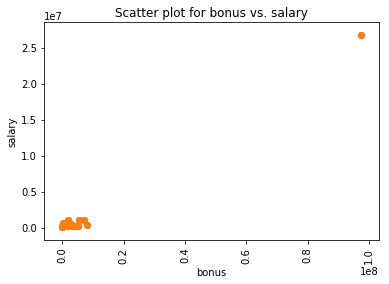

In [22]:
plot_scatter('bonus','salary')

In [23]:
data_df.salary.argmax()

'TOTAL'

In [24]:
data_df.drop('TOTAL',inplace=True)

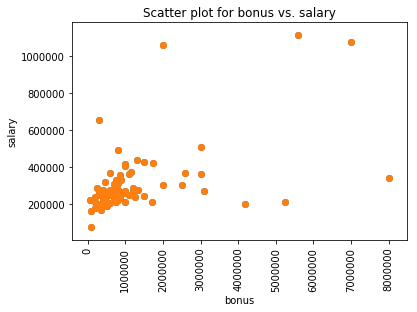

In [25]:
plot_scatter('bonus','salary')

The points are valid and should not be removed .

### Imputing Missing Values.  
Now next thing we do is impute the missing values . First we divide the features into three sets :   
1. Financial Features
2. Email features
3. Target Label

In [26]:
all_features = list(data_df.columns.values)
email_features = ['from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi','to_messages']
target =['poi']
financial_features = [item for item in all_features if item not in email_features and item not in target ]
print financial_features

['bonus', 'exercised_stock_options', 'expenses', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'total_payments', 'total_stock_value']


For Financial features, we will be replacing the missing values with the mean .

In [27]:
financial_df = data_df[financial_features].copy()
financial_df.fillna(financial_df.mean(),inplace=True)

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value
ALLEN PHILLIP K,4.175000e+06,1.729541e+06,13868.000000,304805.0,1.520000e+02,1.260270e+05,2.019550e+05,4.484442e+06,1.729541e+06
BADUM JAMES P,1.201773e+06,2.578170e+05,3486.000000,746491.2,4.694864e+05,1.200658e+06,2.840875e+05,1.824660e+05,2.578170e+05
BANNANTINE JAMES M,1.201773e+06,4.046157e+06,56301.000000,746491.2,8.645230e+05,1.757552e+06,4.770000e+02,9.161970e+05,5.243487e+06
BAXTER JOHN C,1.200000e+06,6.680544e+06,11200.000000,1586055.0,2.660303e+06,3.942714e+06,2.671020e+05,5.634343e+06,1.062326e+07
BAY FRANKLIN R,4.000000e+05,3.218787e+06,129142.000000,746491.2,6.900000e+01,1.457960e+05,2.396710e+05,8.276960e+05,6.301400e+04
BAZELIDES PHILIP J,1.201773e+06,1.599641e+06,54352.724138,93750.0,8.740000e+02,1.200658e+06,8.081800e+04,8.601360e+05,1.599641e+06
BECK SALLY W,7.000000e+05,3.218787e+06,37172.000000,746491.2,5.660000e+02,1.260270e+05,2.313300e+05,9.690680e+05,1.260270e+05
BELDEN TIMOTHY N,5.249999e+06,9.531360e+05,17355.000000,746491.2,2.106980e+05,1.575690e+05,2.139990e+05,5.501630e+06,1.110705e+06
BERBERIAN DAVID,1.201773e+06,1.624396e+06,11892.000000,746491.2,4.694864e+05,8.692200e+05,2.165820e+05,2.284740e+05,2.493616e+06
BERGSIEKER RICHARD P,2.500000e+05,3.218787e+06,59175.000000,180250.0,4.273160e+05,6.592490e+05,1.879220e+05,6.188500e+05,6.592490e+05


For email_features, we will be replacing the missing values with mean .

In [28]:
email_df = data_df[email_features].copy()
email_df.fillna(email_df.mean(),inplace=True)

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
ALLEN PHILLIP K,2195.000000,47.000000,65.000000,1407.000000,2902.000000
BADUM JAMES P,608.790698,64.895349,41.232558,1176.465116,2073.860465
BANNANTINE JAMES M,29.000000,39.000000,0.000000,465.000000,566.000000
BAXTER JOHN C,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAY FRANKLIN R,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAZELIDES PHILIP J,608.790698,64.895349,41.232558,1176.465116,2073.860465
BECK SALLY W,4343.000000,144.000000,386.000000,2639.000000,7315.000000
BELDEN TIMOTHY N,484.000000,228.000000,108.000000,5521.000000,7991.000000
BERBERIAN DAVID,608.790698,64.895349,41.232558,1176.465116,2073.860465
BERGSIEKER RICHARD P,59.000000,4.000000,0.000000,233.000000,383.000000


    Next , we combine the final imputed dataset .

In [29]:
enron_data_df = pd.concat([financial_df,email_df],axis=1, join_axes=[email_df.index])

In [30]:
enron_data_df

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
ALLEN PHILLIP K,4.175000e+06,1.729541e+06,13868.000000,304805.0,1.520000e+02,1.260270e+05,2.019550e+05,4.484442e+06,1.729541e+06,2195.000000,47.000000,65.000000,1407.000000,2902.000000
BADUM JAMES P,1.201773e+06,2.578170e+05,3486.000000,746491.2,4.694864e+05,1.200658e+06,2.840875e+05,1.824660e+05,2.578170e+05,608.790698,64.895349,41.232558,1176.465116,2073.860465
BANNANTINE JAMES M,1.201773e+06,4.046157e+06,56301.000000,746491.2,8.645230e+05,1.757552e+06,4.770000e+02,9.161970e+05,5.243487e+06,29.000000,39.000000,0.000000,465.000000,566.000000
BAXTER JOHN C,1.200000e+06,6.680544e+06,11200.000000,1586055.0,2.660303e+06,3.942714e+06,2.671020e+05,5.634343e+06,1.062326e+07,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAY FRANKLIN R,4.000000e+05,3.218787e+06,129142.000000,746491.2,6.900000e+01,1.457960e+05,2.396710e+05,8.276960e+05,6.301400e+04,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAZELIDES PHILIP J,1.201773e+06,1.599641e+06,54352.724138,93750.0,8.740000e+02,1.200658e+06,8.081800e+04,8.601360e+05,1.599641e+06,608.790698,64.895349,41.232558,1176.465116,2073.860465
BECK SALLY W,7.000000e+05,3.218787e+06,37172.000000,746491.2,5.660000e+02,1.260270e+05,2.313300e+05,9.690680e+05,1.260270e+05,4343.000000,144.000000,386.000000,2639.000000,7315.000000
BELDEN TIMOTHY N,5.249999e+06,9.531360e+05,17355.000000,746491.2,2.106980e+05,1.575690e+05,2.139990e+05,5.501630e+06,1.110705e+06,484.000000,228.000000,108.000000,5521.000000,7991.000000
BERBERIAN DAVID,1.201773e+06,1.624396e+06,11892.000000,746491.2,4.694864e+05,8.692200e+05,2.165820e+05,2.284740e+05,2.493616e+06,608.790698,64.895349,41.232558,1176.465116,2073.860465
BERGSIEKER RICHARD P,2.500000e+05,3.218787e+06,59175.000000,180250.0,4.273160e+05,6.592490e+05,1.879220e+05,6.188500e+05,6.592490e+05,59.000000,4.000000,0.000000,233.000000,383.000000


We will save the this data before feature engineering to compare the results later

In [31]:
old_data = enron_data_df.copy()

###Feature Engineering
1. Email Features

In [32]:
enron_data_df['fraction_from_poi'] = enron_data_df.from_poi_to_this_person / enron_data_df.from_messages
enron_data_df['fraction_to_poi'] = enron_data_df.from_this_person_to_poi / enron_data_df.to_messages
enron_data_df['related_to_poi']= (enron_data_df.from_poi_to_this_person+enron_data_df.from_this_person_to_poi+enron_data_df.shared_receipt_with_poi)/(enron_data_df.to_messages+enron_data_df.from_messages)

In [33]:
enron_data_df

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages,fraction_from_poi,fraction_to_poi,related_to_poi
ALLEN PHILLIP K,4.175000e+06,1.729541e+06,13868.000000,304805.0,1.520000e+02,1.260270e+05,2.019550e+05,4.484442e+06,1.729541e+06,2195.000000,47.000000,65.000000,1407.000000,2902.000000,0.021412,0.022398,0.298018
BADUM JAMES P,1.201773e+06,2.578170e+05,3486.000000,746491.2,4.694864e+05,1.200658e+06,2.840875e+05,1.824660e+05,2.578170e+05,608.790698,64.895349,41.232558,1176.465116,2073.860465,0.106597,0.019882,0.478107
BANNANTINE JAMES M,1.201773e+06,4.046157e+06,56301.000000,746491.2,8.645230e+05,1.757552e+06,4.770000e+02,9.161970e+05,5.243487e+06,29.000000,39.000000,0.000000,465.000000,566.000000,1.344828,0.000000,0.847059
BAXTER JOHN C,1.200000e+06,6.680544e+06,11200.000000,1586055.0,2.660303e+06,3.942714e+06,2.671020e+05,5.634343e+06,1.062326e+07,608.790698,64.895349,41.232558,1176.465116,2073.860465,0.106597,0.019882,0.478107
BAY FRANKLIN R,4.000000e+05,3.218787e+06,129142.000000,746491.2,6.900000e+01,1.457960e+05,2.396710e+05,8.276960e+05,6.301400e+04,608.790698,64.895349,41.232558,1176.465116,2073.860465,0.106597,0.019882,0.478107
BAZELIDES PHILIP J,1.201773e+06,1.599641e+06,54352.724138,93750.0,8.740000e+02,1.200658e+06,8.081800e+04,8.601360e+05,1.599641e+06,608.790698,64.895349,41.232558,1176.465116,2073.860465,0.106597,0.019882,0.478107
BECK SALLY W,7.000000e+05,3.218787e+06,37172.000000,746491.2,5.660000e+02,1.260270e+05,2.313300e+05,9.690680e+05,1.260270e+05,4343.000000,144.000000,386.000000,2639.000000,7315.000000,0.033157,0.052768,0.271831
BELDEN TIMOTHY N,5.249999e+06,9.531360e+05,17355.000000,746491.2,2.106980e+05,1.575690e+05,2.139990e+05,5.501630e+06,1.110705e+06,484.000000,228.000000,108.000000,5521.000000,7991.000000,0.471074,0.013515,0.691091
BERBERIAN DAVID,1.201773e+06,1.624396e+06,11892.000000,746491.2,4.694864e+05,8.692200e+05,2.165820e+05,2.284740e+05,2.493616e+06,608.790698,64.895349,41.232558,1176.465116,2073.860465,0.106597,0.019882,0.478107
BERGSIEKER RICHARD P,2.500000e+05,3.218787e+06,59175.000000,180250.0,4.273160e+05,6.592490e+05,1.879220e+05,6.188500e+05,6.592490e+05,59.000000,4.000000,0.000000,233.000000,383.000000,0.067797,0.000000,0.536199


2. Financial Features

In [34]:
enron_data_df['Effective Salary']= enron_data_df['bonus'] + \
                                enron_data_df['salary'] + \
                                enron_data_df['long_term_incentive'] - \
                                enron_data_df['expenses']


In [35]:
del enron_data_df['bonus']
del enron_data_df['salary']

Peform Feature selection

In [36]:
skb = SelectKBest(f_classif,k='all').fit(enron_data_df,data_df['poi'])
scores = skb.scores_
all_features = enron_data_df.columns.values
sort_index = np.argsort(scores)[::-1]
rank = 1
ranked_features = []
print "Ranking of features is as follows "
for x in sort_index:
    print rank,". Score for ",all_features[x]," is ",scores[x]
    ranked_features.append(all_features[x])
    rank += 1
print all_features

Ranking of features is as follows 
1 . Score for  exercised_stock_options  is  23.6138062092
2 . Score for  total_stock_value  is  16.7366284243
3 . Score for  Effective Salary  is  11.5559727014
4 . Score for  related_to_poi  is  7.72312955873
5 . Score for  total_payments  is  5.75730233923
6 . Score for  restricted_stock  is  5.34226430067
7 . Score for  long_term_incentive  is  5.07283618479
8 . Score for  shared_receipt_with_poi  is  4.87403011599
9 . Score for  fraction_from_poi  is  3.11963598574
10 . Score for  from_poi_to_this_person  is  2.58082108539
11 . Score for  fraction_to_poi  is  1.99020062202
12 . Score for  other  is  1.59257036438
13 . Score for  from_this_person_to_poi  is  1.15629869907
14 . Score for  from_messages  is  0.497759385305
15 . Score for  expenses  is  0.496738048357
16 . Score for  to_messages  is  0.312817105062
['exercised_stock_options' 'expenses' 'long_term_incentive' 'other'
 'restricted_stock' 'total_payments' 'total_stock_value' 'from_message

Now I will make three sets of features , each containing 5 ,7 and 10 top-most features respectively .

In [37]:
features_5 = ranked_features[:5]
features_7 = ranked_features[:7]
features_10 = ranked_features[:10]
print "Features in first set are ",features_5
print "\nFeatures in second set are ",features_7
print "\nFeatures in third set are ",features_10

Features in first set are  ['exercised_stock_options', 'total_stock_value', 'Effective Salary', 'related_to_poi', 'total_payments']

Features in second set are  ['exercised_stock_options', 'total_stock_value', 'Effective Salary', 'related_to_poi', 'total_payments', 'restricted_stock', 'long_term_incentive']

Features in third set are  ['exercised_stock_options', 'total_stock_value', 'Effective Salary', 'related_to_poi', 'total_payments', 'restricted_stock', 'long_term_incentive', 'shared_receipt_with_poi', 'fraction_from_poi', 'from_poi_to_this_person']


In [38]:
#Ref : http://stackoverflow.com/questions/30523735/python-dictionary-as-html-table-in-ipython-notebook
class DictTable(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=100%>"]
        html.append("<tr>")
        html.append("<th>Classifier</th>")
        html.append("<th>Accuracy</th>")
        html.append("<th>Precision</th>")
        html.append("<th>Recall</th>")
        html.append("</tr>")
        for key, value in self.iteritems():
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            for key_inner,value_inner in value.iteritems():
                html.append("<td>{0}</td>".format(value_inner))
                
           
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [39]:
labels = data_df['poi']
from sklearn.cluster import KMeans
classifier_dict = {'Logistic Regrssion':LogisticRegression(random_state = 0,max_iter=500,class_weight='balanced'),
                    'SVM_rbf':SVC(class_weight='balanced',kernel='rbf'),
                   'SVM_sigmoid':SVC(class_weight='balanced',kernel='sigmoid'),
                  'Gaussian Naive Bayes':GaussianNB(),
                  'SVM_linear':LinearSVC(random_state=0,class_weight='balanced'),
                  'Decision Tree':DecisionTreeClassifier(class_weight='balanced',min_samples_split=5),
                  'Random Forest': RandomForestClassifier(n_estimators=100,class_weight='balanced'),
                  'KNN':KNeighborsClassifier()
                  }

In [40]:
def get_score_table(features_set,dataset=enron_data_df):
    features = dataset[features_set]
    classifier_comp = {}
    for x in classifier_dict.keys():
        pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                         ("classifier",classifier_dict[x])])
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        acc = []
        pre = []
        rec = []
        for train_index, test_index in cv.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            y_train, y_test = labels[train_index], labels[test_index]
        #cv=StratifiedKFold(n_splits=n_splits).split(enron_data_df[features_5], data_df['poi'])
            pipeline.fit(X_train,y_train)
            predictions = pipeline.predict(X_test)
            acc.append(accuracy_score(predictions,y_test))
            pre.append(precision_score(predictions,y_test))
            rec.append(recall_score(predictions,y_test))
        #print pipeline.named_steps
        classifier_comp[x]={}
        classifier_comp[x]['accuracy']=np.mean(acc)
        classifier_comp[x]['precision']=np.mean(pre)
        classifier_comp[x]['recall']=np.mean(rec)
    return classifier_comp


In [41]:
#Using top 5 features :d
print "Using Top 5 fetaures"
DictTable(get_score_table(features_5))

Using Top 5 fetaures


/home/kashif/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Classifier,Accuracy,Precision,Recall
KNN,0.222222222222,0.133333333333,0.861111111111
Decision Tree,0.376082251082,0.6,0.787037037037
SVM_rbf,0.256613756614,0.666666666667,0.666666666667
Gaussian Naive Bayes,0.638888888889,0.266666666667,0.861111111111
SVM_linear,0.313131313131,0.6,0.759259259259
Logistic Regrssion,0.308913308913,0.666666666667,0.740740740741
SVM_sigmoid,0.241666666667,0.866666666667,0.592592592593
Random Forest,0.25,0.133333333333,0.842592592593


In [42]:
#Using top 7 features :d
print "Using Top 7 fetaures"
DictTable(get_score_table(features_7))

Using Top 7 fetaures


Classifier,Accuracy,Precision,Recall
KNN,0.166666666667,0.0666666666667,0.861111111111
Decision Tree,0.419312169312,0.466666666667,0.805555555556
SVM_rbf,0.235338345865,0.666666666667,0.648148148148
Gaussian Naive Bayes,0.361111111111,0.266666666667,0.833333333333
SVM_linear,0.323232323232,0.6,0.768518518519
Logistic Regrssion,0.308913308913,0.666666666667,0.740740740741
SVM_sigmoid,0.224937343358,0.733333333333,0.611111111111
Random Forest,0.0833333333333,0.0666666666667,0.833333333333


In [43]:
#Using top 10 features :d
print "Using Top 10 fetaures"
DictTable(get_score_table(features_10))

Using Top 10 fetaures


Classifier,Accuracy,Precision,Recall
KNN,0.833333333333,0.266666666667,0.87962962963
Decision Tree,0.233333333333,0.333333333333,0.759259259259
SVM_rbf,0.378754578755,0.733333333333,0.787037037037
Gaussian Naive Bayes,0.373015873016,0.333333333333,0.824074074074
SVM_linear,0.327777777778,0.6,0.768518518519
Logistic Regrssion,0.340992340992,0.666666666667,0.759259259259
SVM_sigmoid,0.24864024864,0.666666666667,0.685185185185
Random Forest,0.333333333333,0.0666666666667,0.851851851852


It can be seen clearly that Top 10 features set is giving the worst performance among all 3, so we will discard it .  
Now we are left with the Top 5 and Top 7 features set respectively . Now after examining the above three tables , I observed the following facts :
1. KNN classifier is performing the most poorly among all classifier for all sets .
2. Decision Tree's performance remained more or less stable.
3. SVM with rbf reported the best results with Top 5 features.
4. Since Gaussian Naive Bayes can't be used for parameter tuning, I will discard it since it's scores are not good enough as well.
5. SVM with linear kernel reported the best results with Top 5 features.
6. Logistic regression reported more or less constant results.
7. SVM with linear kernel reported the best results with Top 7 features.
8. Random Forest reports good results for both top 5 and top 10 features .

After considering the above mentioned facts, I selected Top 5 features set as the final features set for classification .
I selected the following algorithm for fine tuning as well :
1. SVM with 'sigmoid' kernel
2. Logistic Regression
3. Decision Trees


In [44]:
features = enron_data_df[features_7]

Now based on the performance of above classifiers, I have decided to select the following classifiers for fine tuning :
1. SVM with 'rbf' kernel
2. Logistic Regression
3. Decision Trees

In [45]:
def get_best_estimator(my_clf,param_grid,features=features,lables = labels,n_splits = 10):
    skb = SelectKBest(f_classif)
    clf = pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                     ("classifier",my_clf)])
    cv=StratifiedKFold(n_splits=n_splits).split(features,labels)
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10,scoring=make_scorer(f1_score,average='weighted'),cv=list(cv))
    grid_search.fit(features.values,labels.values)
    return grid_search


In [46]:
my_dataset = pd.concat([labels,features],axis=1)
my_feature_list = my_dataset.columns.values
my_dataset = my_dataset.transpose().to_dict()
grid_comp = {}

In [47]:
my_clf = LogisticRegression(random_state = 0,max_iter=500,class_weight='balanced')
param_grid = dict(
                classifier__tol=[1.0,0.1,0.01,0.001],
                  classifier__C = np.power([10.0]*5,list(xrange(-3,2))).tolist(),
                  classifier__solver =['newton-cg', 'lbfgs', 'liblinear', 'sag'],

                 )
grid_logistic = get_best_estimator(my_clf,param_grid)


Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.800463 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.904762 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.629630 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.833333 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.708333 -   0.0s
[CV] classifier__C=0.001, classifier__solv

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
/home/kashif/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=0.614035 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=0.851852 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=0.714286 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=1.000000 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=0.853535 -   0.0s
[CV] classifier__C=0.001, classifier__solver=lbfgs, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=lbfgs, classifier__tol=1.0, score=0.800463 -

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    4.6s finished


In [48]:
grid_comp['Logistic Regression']=grid_logistic.best_score_

In [49]:
my_clf = SVC(class_weight='balanced',random_state=0,kernel='rbf',max_iter=500)
param_grid = dict(
                  classifier__tol=[1.0,0.1,0.01,0.001],
                  classifier__C = np.power([10.0]*4,list(xrange(-2,2))).tolist(),
                    classifier__gamma = 1.0/np.asarray(list(xrange(1,6))),
                 )
grid_svm = get_best_estimator(my_clf,param_grid)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0, score=0.041026 -   0.0s
[CV] classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=1.0, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=1.0, classifier__

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0, score=0.047619 -   0.0s
[CV] classifier__gamma=0.5, classifier__C=0.01, classifier__tol=1.0 ..
[CV]  clas

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    4.1s finished


In [50]:
grid_comp['SVM with sigmoid kernel']=grid_svm.best_score_
print grid_svm.best_estimator_
print grid_comp

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=500, probability=False, random_state=0, shrinking=True, tol=0.1,
  verbose=False))])
{'SVM with sigmoid kernel': 0.7779998761865191, 'Logistic Regression': 0.8218401985300049}


In [51]:
my_clf = DecisionTreeClassifier(random_state=0,class_weight='balanced')
param_grid = dict(
                classifier__min_samples_split=list(xrange(2,20,5)),
                classifier__max_leaf_nodes =list(xrange(50,100,20)),
                classifier__max_depth = list(xrange(1,10,2))
                )
grid_dt = get_best_estimator(my_clf,param_grid)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2 
[CV]  classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2, score=0.602564 -   0.0s
[CV] classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2 
[CV]  classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2, score=0.714286 -   0.0s
[CV] classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2 
[CV]  classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2, score=0.614035 -   0.0s
[CV] classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2 
[CV]  classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_split=2, score=0.445221 -   0.0s
[CV] classifier__max_leaf_nodes=50, classifier__max_depth=1, classifier__min_samples_

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7, score=0.714286 -   0.0s
[CV] classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7 
[CV]  classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7, score=0.614035 -   0.0s
[CV] classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7 
[CV]  classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7, score=0.445221 -   0.0s
[CV] classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7 
[CV]  classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7, score=0.490196 -   0.0s
[CV] classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7 
[CV]  classifier__max_leaf_nodes=70, classifier__max_depth=1, classifier__min_samples_split=7, score=0.635854 -   0.0s
[CV] classifier__max_leaf_nod

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.7s finished


In [52]:
grid_comp['Decision Tree']=grid_dt.best_score_

In [53]:
#Ref : http://stackoverflow.com/questions/30523735/python-dictionary-as-html-table-in-ipython-notebook
class DictTable_grid(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=100%>"]
        html.append("<tr>")
        html.append("<th>Classifier</th>")
        html.append("<th>F1 score</th>")
        html.append("</tr>")
        for key, value in self.iteritems():
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [54]:
DictTable_grid(grid_comp)

Classifier,F1 score
SVM with sigmoid kernel,0.777999876187
Logistic Regression,0.82184019853
Decision Tree,0.746548237458


Based on the above table, the best classifier is Logistic Kernel.

In [55]:
best_clf = grid_logistic.best_estimator_
print best_clf
pickle.dump(best_clf, open("my_classifier.pkl", "w"))
pickle.dump(my_dataset, open("my_dataset.pkl", "w"))
pickle.dump(my_feature_list, open("my_feature_list.pkl", "w"))

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=0.01, verbose=0, warm_start=False))])


# Comparision with old dataset before Feature Engineering

In [56]:
skb = SelectKBest(f_classif,k='all').fit(old_data,data_df['poi'])
scores = skb.scores_
all_features = old_data.columns.values
sort_index = np.argsort(scores)[::-1]
rank = 1
ranked_features = []
print "Ranking of features is as follows "
for x in sort_index:
    print rank,". Score for ",all_features[x]," is ",scores[x]
    ranked_features.append(all_features[x])
    rank += 1
print all_features

Ranking of features is as follows 
1 . Score for  exercised_stock_options  is  23.6138062092
2 . Score for  total_stock_value  is  16.7366284243
3 . Score for  bonus  is  9.73938229385
4 . Score for  salary  is  7.99996454308
5 . Score for  total_payments  is  5.75730233923
6 . Score for  restricted_stock  is  5.34226430067
7 . Score for  long_term_incentive  is  5.07283618479
8 . Score for  shared_receipt_with_poi  is  4.87403011599
9 . Score for  from_poi_to_this_person  is  2.58082108539
10 . Score for  other  is  1.59257036438
11 . Score for  from_this_person_to_poi  is  1.15629869907
12 . Score for  from_messages  is  0.497759385305
13 . Score for  expenses  is  0.496738048357
14 . Score for  to_messages  is  0.312817105062
['bonus' 'exercised_stock_options' 'expenses' 'long_term_incentive' 'other'
 'restricted_stock' 'salary' 'total_payments' 'total_stock_value'
 'from_messages' 'from_poi_to_this_person' 'from_this_person_to_poi'
 'shared_receipt_with_poi' 'to_messages']


Lets perform analysis using the same classifiers over the top 7 features in the old dataset

In [57]:
old_top7_features = ranked_features[:7]
print old_top7_features

['exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'total_payments', 'restricted_stock', 'long_term_incentive']


Now to compare the results with the old set,we use the model used previously 

In [58]:
my_clf = LogisticRegression(random_state = 0,max_iter=500,class_weight='balanced')
param_grid = dict(
                classifier__tol=[1.0,0.1,0.01,0.001],
                  classifier__C = np.power([10.0]*5,list(xrange(-3,2))).tolist(),
                  classifier__solver =['newton-cg', 'lbfgs', 'liblinear', 'sag'],

                 )
grid_logistic = get_best_estimator(my_clf,param_grid,features=old_data[old_top7_features],lables=labels,)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.846154 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.757576 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.768421 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.833333 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=1.0, score=0.922807 -   0.0s
[CV] classifier__C=0.001, classifier__solv

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=1.000000 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=0.714286 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=1.000000 -   0.0s
[CV] classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001 
[CV]  classifier__C=0.001, classifier__solver=newton-cg, classifier__tol=0.001, score=0.853535 -   0.0s
[CV] classifier__C=0.001, classifier__solver=lbfgs, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=lbfgs, classifier__tol=1.0, score=0.846154 -   0.0s
[CV] classifier__C=0.001, classifier__solver=lbfgs, classifier__tol=1.0 
[CV]  classifier__C=0.001, classifier__solver=lbfgs, classifier__tol=1.0, score=0.757576 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    4.5s finished


In [66]:
grid_comp['Logistic Regression on old features']=grid_logistic.best_score_
old_clf = grid_logistic.best_estimator_
grid_comp.pop('SVM with sigmoid kernel',None)
grid_comp.pop('Decision Tree',None)
print old_clf

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=1.0, verbose=0, warm_start=False))])


In [67]:
DictTable_grid(grid_comp)

Classifier,F1 score
Logistic Regression on old features,0.828709729506
Logistic Regression,0.82184019853


As you can see clearly, the new features perform better than the old set of features

In [61]:
from tester import test_classifier
my_dataset_old = pd.concat([labels,old_data[old_top7_features]],axis=1)
my_feature_list_old = my_dataset_old.columns.values
my_dataset_old = my_dataset_old.transpose().to_dict()


In [62]:
test_classifier(old_clf,my_dataset_old,my_feature_list_old)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=1.0, verbose=0, warm_start=False))])
	Accuracy: 0.70850	Precision: 0.28465	Recall: 0.49500	F1: 0.36145	F2: 0.43126
	Total predictions: 12000	True positives:  990	False positives: 2488	False negatives: 1010	True negatives: 7512

